In [2]:
import pandas as pd

file_path = r"C:\Users\AZIZ\OneDrive\Images\IBM data science\Cours 8\Module 4\historical_automobile_sales.csv"
data = pd.read_csv(file_path)

print(data.head())


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

### Tâche 1.1 : Fluctuation des ventes d'automobiles d'année en année
Dans cette tâche, nous utilisons les fonctionnalités de Pandas pour agréger les ventes annuelles (`Automobile_Sales`) par année (`Year`) et tracer un graphique linéaire pour visualiser comment les ventes fluctuent d'une année à l'autre.

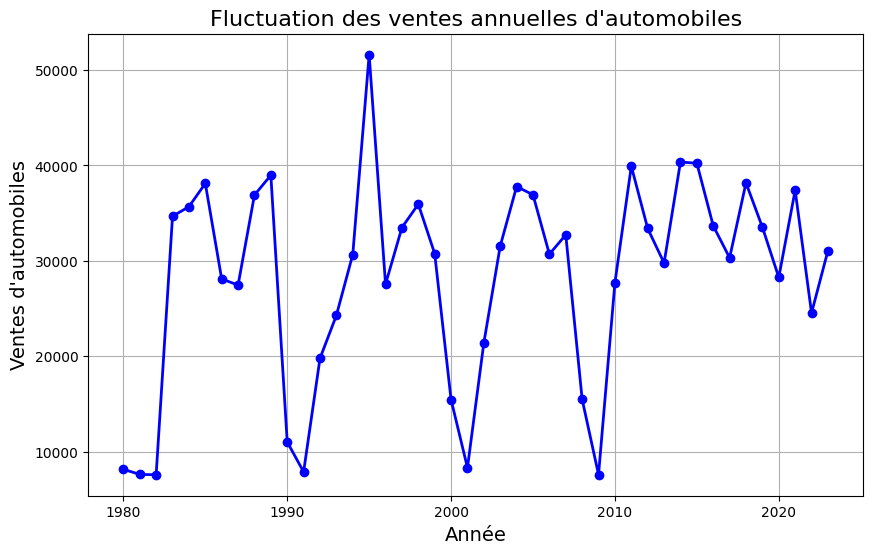

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

annual_sales = data.groupby('Year')['Automobile_Sales'].sum()

plt.figure(figsize=(10, 6))
annual_sales.plot(kind='line', marker='o', color='blue', linewidth=2)

plt.title("Fluctuation des ventes annuelles d'automobiles", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Ventes d'automobiles", fontsize=14)
plt.grid(True)

plt.savefig("Line_plot_1.png")
plt.show()


### Tâche 1.2 : Tendance des ventes par catégorie de véhicules pendant les récessions
Dans cette tâche, nous analysons les tendances des ventes par type de véhicule (`Vehicle_Type`) pendant les périodes de récession. Le graphique montre une ligne pour chaque catégorie, ce qui permet de comparer les tendances et de répondre à la question : "Y a-t-il une différence notable dans l'évolution des ventes entre les différents types de véhicules pendant les récessions ?"


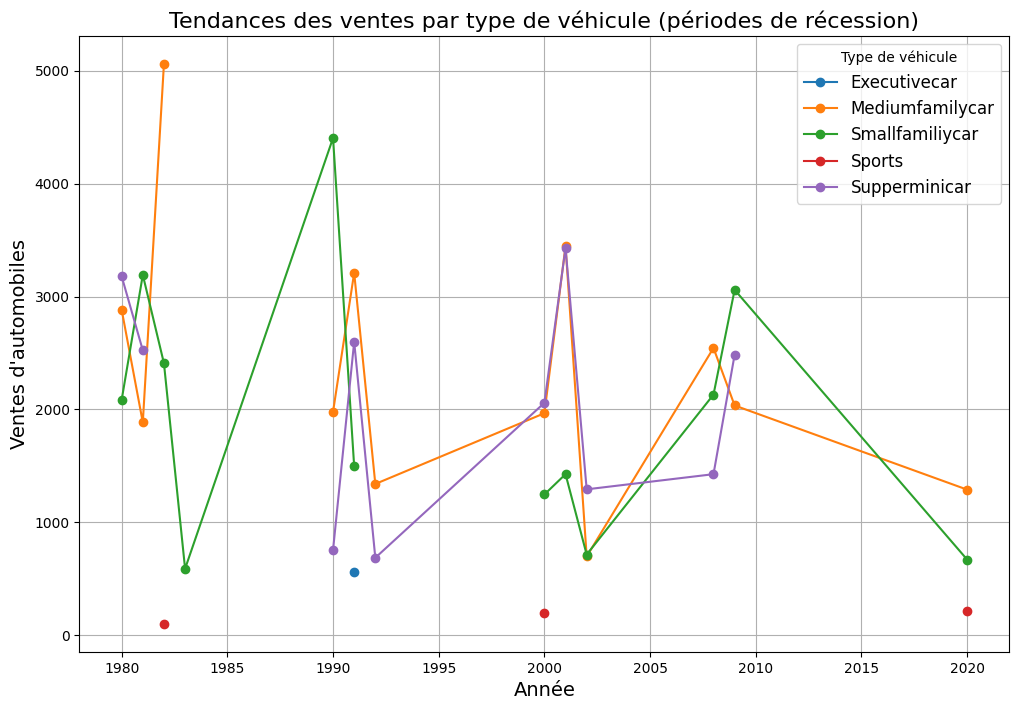

In [6]:
recession_data = data[data['Recession'] == 1]

vehicle_sales_recession = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
for vehicle_type in vehicle_sales_recession.columns:
    plt.plot(vehicle_sales_recession.index, vehicle_sales_recession[vehicle_type], label=vehicle_type, marker='o')

plt.title("Tendances des ventes par type de véhicule (périodes de récession)", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Ventes d'automobiles", fontsize=14)
plt.legend(title="Type de véhicule", fontsize=12)
plt.grid(True)

plt.savefig("Line_plot_2.png")
plt.show()


### Tâche 1.3 : Comparaison des ventes par type de véhicule (Récession vs Non-Récession)
Dans cette tâche, nous utilisons la bibliothèque **Seaborn** pour créer un diagramme à barres. Ce graphique compare les ventes d'automobiles par type de véhicule (`Vehicle_Type`) pendant les périodes de récession et de non-récession. Cela nous permet de visualiser les différences de ventes pour chaque type de véhicule dans ces deux contextes économiques.


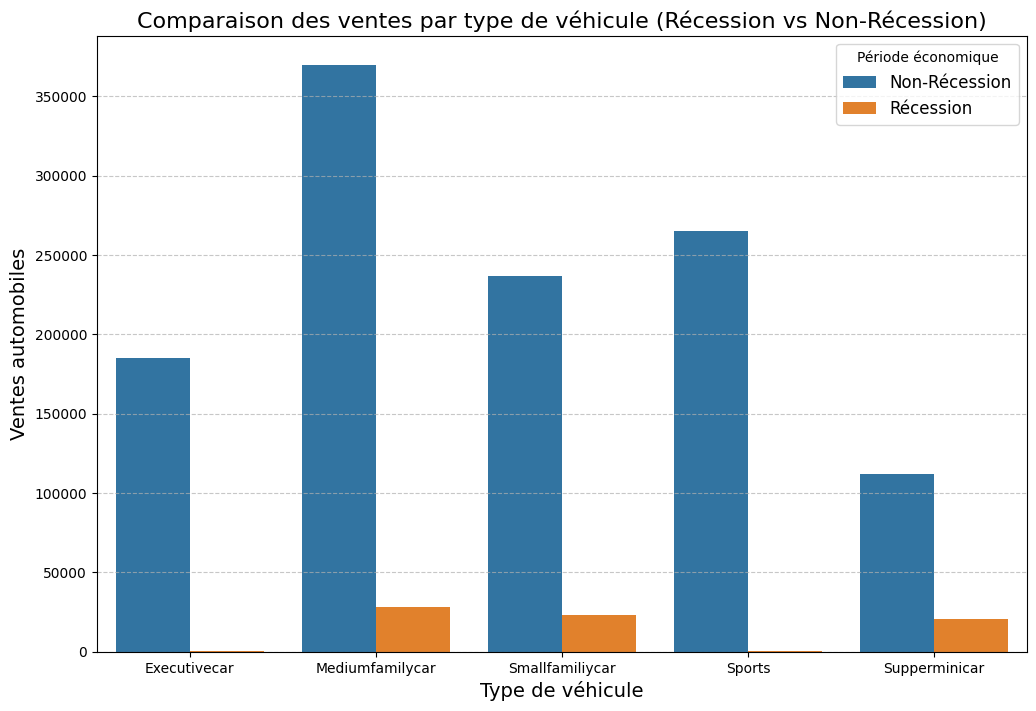

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

vehicle_sales_comparison = data.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

vehicle_sales_comparison['Recession'] = vehicle_sales_comparison['Recession'].replace({1: 'Récession', 0: 'Non-Récession'})

plt.figure(figsize=(12, 8))
sns.barplot(data=vehicle_sales_comparison, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')

plt.title("Comparaison des ventes par type de véhicule (Récession vs Non-Récession)", fontsize=16)
plt.xlabel("Type de véhicule", fontsize=14)
plt.ylabel("Ventes automobiles", fontsize=14)
plt.legend(title="Période économique", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("Bar_Chart.png")
plt.show()


### Tâche 1.4 : Comparaison des variations du PIB
Dans cette tâche, nous utilisons des sous-graphiques pour représenter le Produit Intérieur Brut (PIB) sur deux périodes distinctes :
1. Pendant les périodes de récession.
2. Hors des périodes de récession.

Chaque sous-graphe présente un graphique linéaire montrant l'évolution du PIB (`GDP`) au fil des années (`Year`), avec des étiquettes et des titres appropriés.


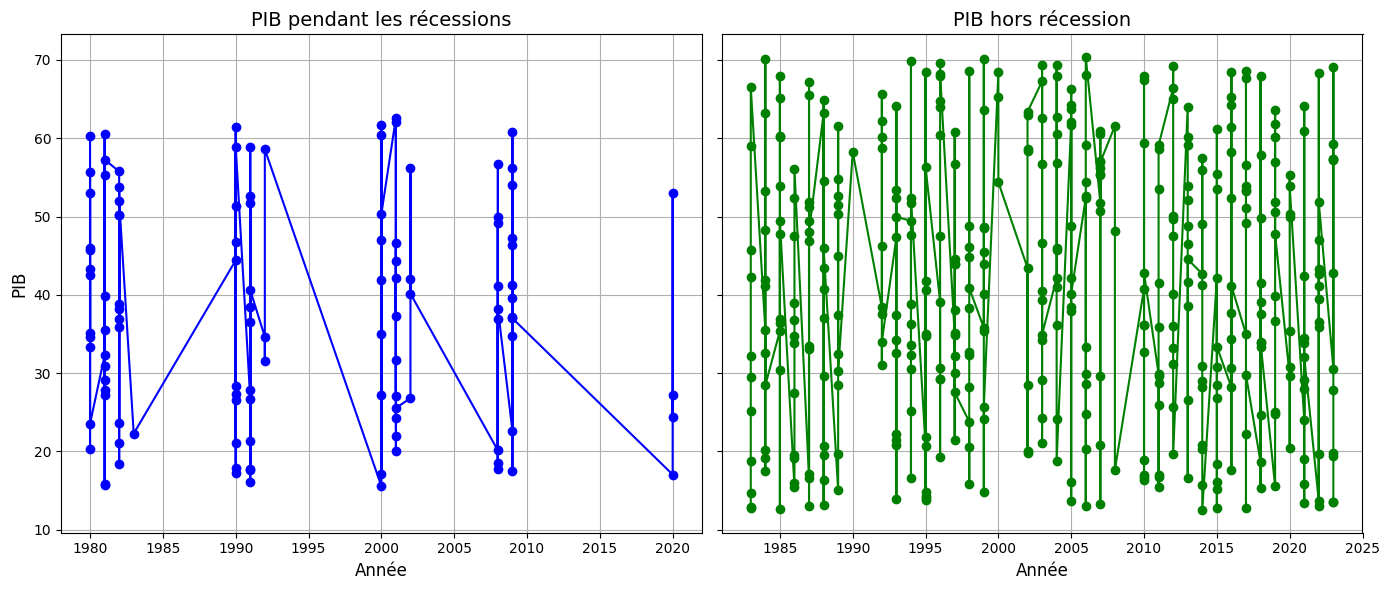

In [8]:
import matplotlib.pyplot as plt

recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].plot(recession_data['Year'], recession_data['GDP'], color='blue', marker='o', linestyle='-')
axes[0].set_title("PIB pendant les récessions", fontsize=14)
axes[0].set_xlabel("Année", fontsize=12)
axes[0].set_ylabel("PIB", fontsize=12)
axes[0].grid(True)

axes[1].plot(non_recession_data['Year'], non_recession_data['GDP'], color='green', marker='o', linestyle='-')
axes[1].set_title("PIB hors récession", fontsize=14)
axes[1].set_xlabel("Année", fontsize=12)
axes[1].grid(True)

plt.tight_layout()

# Sauvegarder et afficher le graphique
plt.savefig("Subplot.png")
plt.show()


### Tâche 1.5 : Impact de la saisonnalité sur les ventes automobiles
Dans cette tâche, nous développons un graphique à bulles pour analyser l'impact de la saisonnalité sur les ventes d'automobiles (`Automobile_Sales`). La taille des bulles varie en fonction du poids saisonnier (`Seasonality_Weight`), ce qui permet de visualiser son influence sur les ventes.


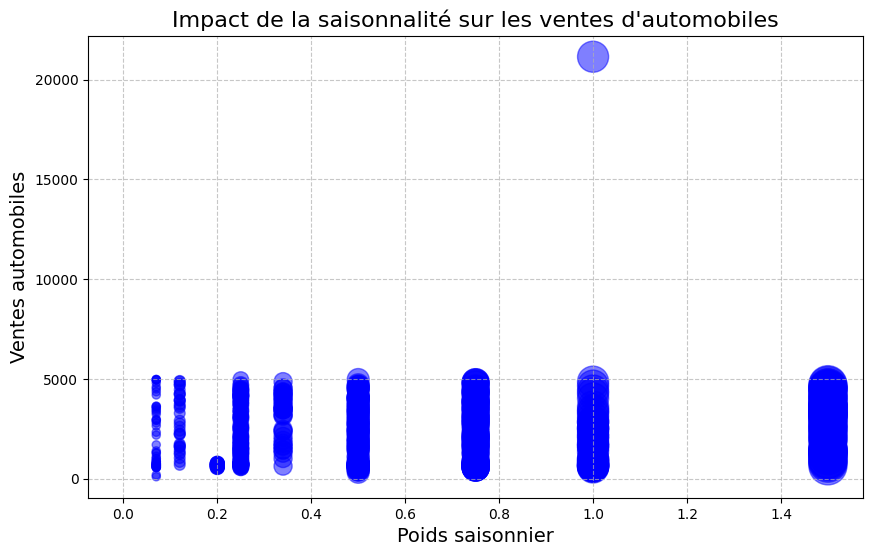

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Seasonality_Weight'], data['Automobile_Sales'], 
            s=data['Seasonality_Weight']*500, alpha=0.5, color='blue')

plt.title("Impact de la saisonnalité sur les ventes d'automobiles", fontsize=16)
plt.xlabel("Poids saisonnier", fontsize=14)
plt.ylabel("Ventes automobiles", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("Bubble.png")
plt.show()


### Tâche 1.6 : Corrélation entre le prix moyen des véhicules et le volume des ventes
Dans cette tâche, nous utilisons un diagramme de dispersion pour analyser la relation entre le prix moyen des véhicules (`Price`) et le volume des ventes (`Automobile_Sales`) pendant les périodes de récession.


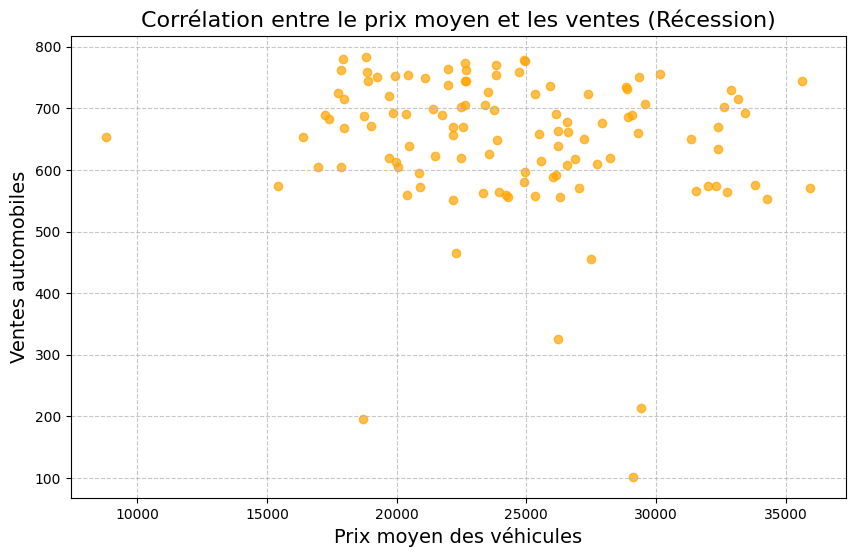

In [10]:
import matplotlib.pyplot as plt

recession_data = data[data['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], alpha=0.7, color='orange')
plt.title("Corrélation entre le prix moyen et les ventes (Récession)", fontsize=16)
plt.xlabel("Prix moyen des véhicules", fontsize=14)
plt.ylabel("Ventes automobiles", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("Scatter.png")
plt.show()


### Tâche 1.7 : Part des dépenses publicitaires pendant les périodes de récession et de non-récession
Dans cette tâche, nous créons un diagramme circulaire pour visualiser les proportions des dépenses publicitaires de XYZAutomotives entre les périodes de récession et de non-récession.


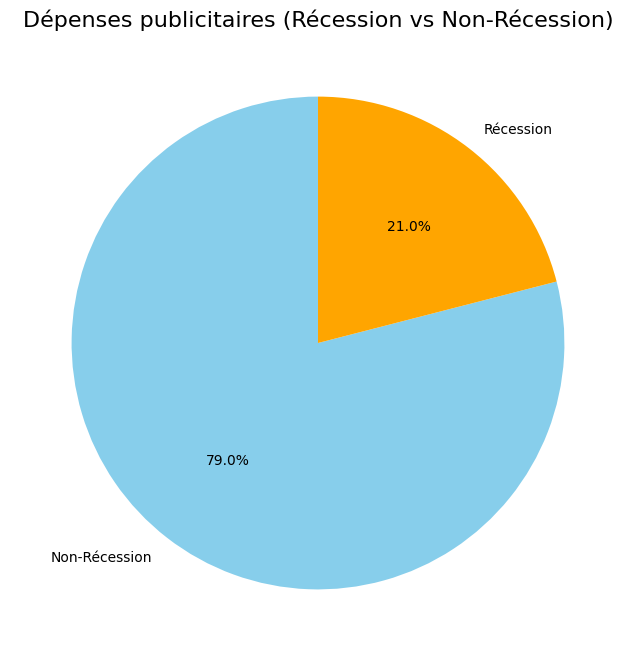

In [17]:
import matplotlib.pyplot as plt

ad_spending = data.groupby('Recession')['Advertising_Expenditure'].sum()

ad_spending.index = ['Non-Récession', 'Récession']

# On trace le diagramme circulaire
plt.figure(figsize=(8, 8))
ad_spending.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=ad_spending.index, colors=['skyblue', 'orange'])
plt.title("Dépenses publicitaires (Récession vs Non-Récession)", fontsize=16)
plt.ylabel("")

# Sauvegarder et afficher le graphique
plt.savefig("Pie_1.png")
plt.show()


### Tâche 1.8 : Diagramme circulaire des dépenses publicitaires par type de véhicule pendant la récession
Dans cette tâche, nous visualisons la répartition des dépenses publicitaires totales (`Advertising_Expenditure`) pour chaque type de véhicule pendant la période de récession.


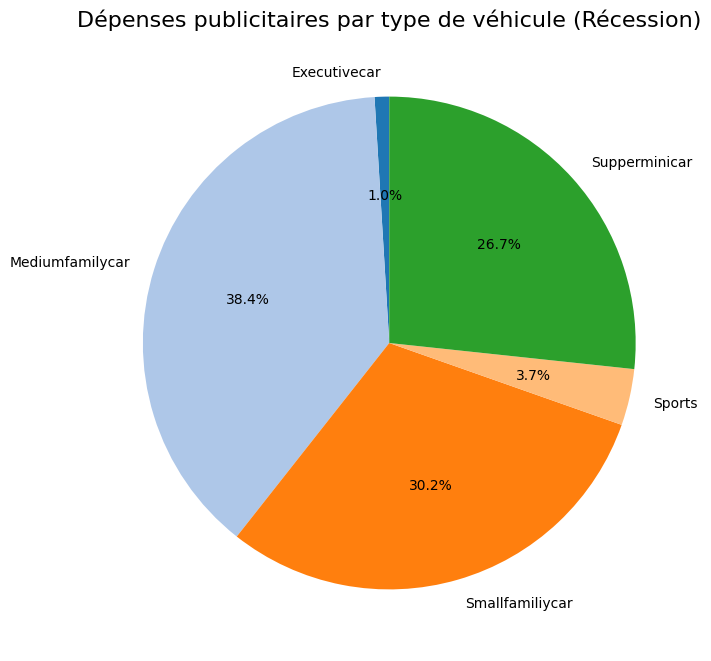

In [18]:
import matplotlib.pyplot as plt

# Je filtre d'abord les données pour la récession
recession_vehicle_ad = data[data['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
recession_vehicle_ad.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=recession_vehicle_ad.index, colors=plt.cm.tab20.colors)
plt.title("Dépenses publicitaires par type de véhicule (Récession)", fontsize=16)
plt.ylabel("")

# Sauvegarder et afficher le graphique
plt.savefig("Pie_2.png")
plt.show()


### Tâche 1.9 : Analyse de l'effet du taux de chômage sur les ventes par type de véhicule
Dans cette tâche, nous traçons un graphique linéaire pour analyser l'impact du taux de chômage (`unemployment_rate`) sur les ventes d'automobiles (`Automobile_Sales`) pour chaque type de véhicule (`Vehicle_Type`) pendant la période de récession.


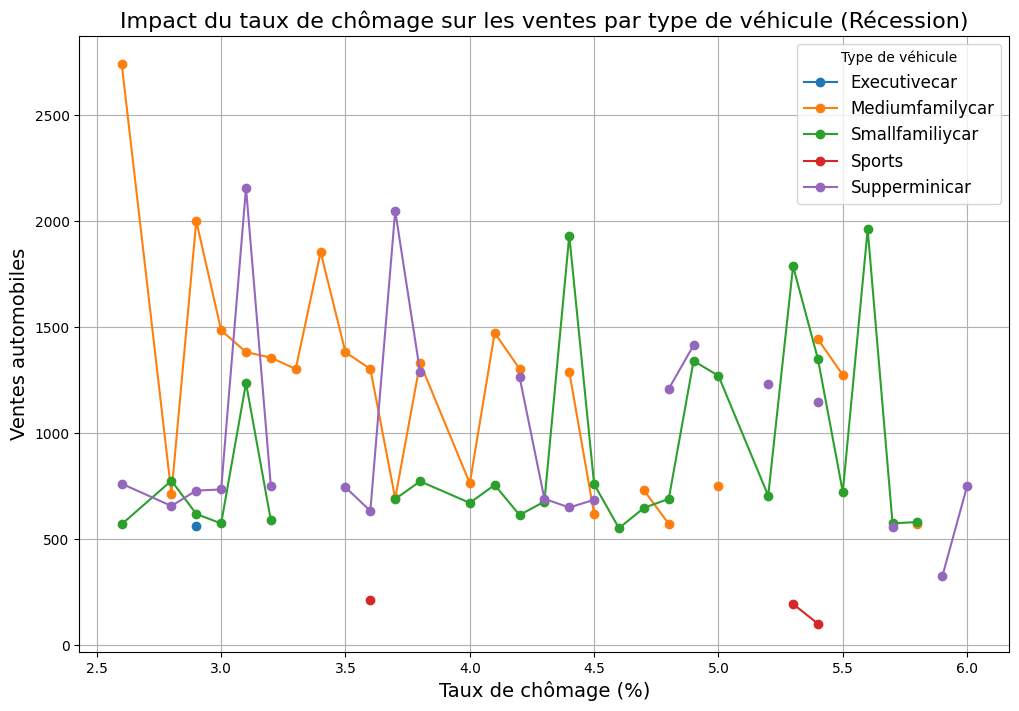

In [19]:
import matplotlib.pyplot as plt

recession_data = data[data['Recession'] == 1]

unemployment_sales = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
for vehicle_type in unemployment_sales.columns:
    plt.plot(unemployment_sales.index, unemployment_sales[vehicle_type], label=vehicle_type, marker='o')

plt.title("Impact du taux de chômage sur les ventes par type de véhicule (Récession)", fontsize=16)
plt.xlabel("Taux de chômage (%)", fontsize=14)
plt.ylabel("Ventes automobiles", fontsize=14)
plt.legend(title="Type de véhicule", fontsize=12)
plt.grid(True)

plt.savefig("Line_plot_3.png")
plt.show()


Dans cette section, nous créons une application **Dash** avec les fonctionnalités suivantes :
1. **Tâche 2.1 :** Un titre centré et en texte coloré : "Tableau de bord des statistiques de vente d'automobiles".
2. **Tâche 2.2 :** Deux menus déroulants pour "Sélectionner les statistiques" et "Saisir l'année".
3. **Tâche 2.3 :** Une division pour afficher les sorties avec des propriétés `id` et `classname` appropriées.
4. **Tâche 2.4 :** Deux rappels :
   - Met à jour l'entrée en fonction du type de rapport sélectionné.
   - Affiche des graphiques dans le conteneur de sortie.
5. **Tâche 2.5 :** Génère des graphiques pour les statistiques du rapport sur la récession.


In [25]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

file_path = r"C:\Users\AZIZ\OneDrive\Images\IBM data science\Cours 8\Module 4\historical_automobile_sales.csv"
data = pd.read_csv(file_path)

recession_data = data[data['Recession'] == 1]

# Créer l'application Dash
app = Dash(__name__)

# Layout de l'application
app.layout = html.Div([
    html.H1("Tableau de bord des statistiques de vente d'automobiles",
            style={'textAlign': 'center', 'color': 'blue'}),

    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Ventes par type de véhicule', 'value': 'vehicle_sales'},
            {'label': 'Taux de chômage et ventes', 'value': 'unemployment_sales'}
        ],
        placeholder='Sélectionner les statistiques',
        style={'margin': '10px'}
    ),
    
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(data['Year'].unique())],
        placeholder='Saisir l\'année',
        style={'margin': '10px'},
        disabled=True
    ),
    
    html.Div(id='output-div', className='output-container', style={'marginTop': '20px'})
])

# Rappel pour activer le menu déroulant d'année
@app.callback(
    Output('year-dropdown', 'disabled'),
    Input('stat-dropdown', 'value')
)
def update_year_dropdown(stat):
    return False if stat == 'vehicle_sales' else True

# Rappel pour afficher les graphiques
@app.callback(
    Output('output-div', 'children'),
    [Input('stat-dropdown', 'value'), Input('year-dropdown', 'value')]
)
def update_output(stat, year):
    if stat == 'vehicle_sales':
        # Graphique des ventes par type de véhicule
        vehicle_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig = px.bar(vehicle_sales, x='Vehicle_Type', y='Automobile_Sales',
                     title="Ventes par type de véhicule (Récession)", text='Automobile_Sales')
        return dcc.Graph(figure=fig)
    elif stat == 'unemployment_sales':
        # Graphique du taux de chômage et des ventes
        unemployment_sales = recession_data.groupby('unemployment_rate')['Automobile_Sales'].sum().reset_index()
        fig = px.line(unemployment_sales, x='unemployment_rate', y='Automobile_Sales',
                      title="Impact du taux de chômage sur les ventes (Récession)")
        return dcc.Graph(figure=fig)
    else:
        return html.P("Sélectionnez une statistique pour voir le graphique.")

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)
